In [ ]:
#!pip install tensorflow-gpu==2.0.0b1
%load_ext tensorboard
%matplotlib inline

# Diagnosis with an auto-encoder

based on Arvin Singh Kushwaha https://towardsdatascience.com/how-to-make-an-autoencoder-2f2d99cd5103

Tareas a realizar:
- Integre diagnósticos (Tensorboard) para poder observar mejor el entrenamiento
  - Procure hacer el entrenamiento con tan pocos datos que se logre un sobreajuste
  - Procure sesgar el modelo de modo que se pueda observar en las curvas
- Haga ajustes al auto-encoder para mejorar el desempeño



In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

import datetime

from tensorflow.keras.callbacks import TensorBoard

In [ ]:
LATENT_SIZE = 16
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128),
    LeakyReLU(),
    #Dropout(0.5),
    Dense(64),
    LeakyReLU(),
    #Dropout(0.5),
    Dense(LATENT_SIZE, activation="sigmoid"),
])

In [ ]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LeakyReLU(),
    #Dropout(0.5),
    Dense(128),
    LeakyReLU(),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [ ]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "MeanAbsoluteError", metrics=['Accuracy','Precision','Recall']) #BinaryAccuracy

In [ ]:
(x_train_all, y_train_all), (x_test_all, y_test_all) = mnist.load_data()

x_train_all = x_train_all/255.0
x_test_all = x_test_all/255.0

loss_log = []

for i in range(1,100,10):
  ## Don't use everything: just a fraction of all available data
  idx=np.random.choice(x_train_all.shape[0],int(i/100*x_train_all.shape[0]))

  x_train = x_train_all[idx,:,:]
  y_train = y_train_all[idx]

  x_test = x_test_all
  y_test = y_test_all

  print("Training data with {0} samples".format(x_train.shape[0]))
  print("Validation data with {0} samples".format(x_test.shape[0]))

  # Plot image data from x_train
  #plt.imshow(x_train[0], cmap = "gray")
  #plt.show()

  log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

  ## TensorBoard Callback
  tcb = TensorBoard(log_dir=log_dir, histogram_freq=1)

  EPOCHS = 5

  history_callback = model.fit(x_train, x_train, 
                              batch_size = 64, epochs=EPOCHS,
                              validation_data=(x_test, x_test),
                              callbacks=[tcb])
  loss_log.append(history_callback.history['loss'][-1])

  #loss_summary = tf.summary.scalar('loss', history_callback.history['loss'][-1])

Training data with 600 samples
Validation data with 10000 samples
Epoch 1/5
10/10 [==============================] - 3s 171ms/step - loss: 0.4614 - accuracy: 0.0000e+00 - precision: 0.2260 - recall: 0.4238 - val_loss: 0.3845 - val_accuracy: 0.0000e+00 - val_precision: 0.4848 - val_recall: 0.1679
Epoch 2/5
10/10 [==============================] - 1s 59ms/step - loss: 0.3341 - accuracy: 0.0000e+00 - precision: 0.5531 - recall: 0.1437 - val_loss: 0.1898 - val_accuracy: 0.0000e+00 - val_precision: 0.6914 - val_recall: 0.0778
Epoch 3/5
10/10 [==============================] - 1s 56ms/step - loss: 0.1666 - accuracy: 0.0000e+00 - precision: 0.6895 - recall: 0.0876 - val_loss: 0.1359 - val_accuracy: 0.0000e+00 - val_precision: 0.6906 - val_recall: 0.0914
Epoch 4/5
10/10 [==============================] - 1s 58ms/step - loss: 0.1309 - accuracy: 0.0000e+00 - precision: 0.6778 - recall: 0.0869 - val_loss: 0.1287 - val_accuracy: 0.0000e+00 - val_precision: 0.6843 - val_recall: 0.1132
Epoch 5/5
10/

[0.12597517669200897, 0.1251056045293808, 0.12472741305828094, 0.12501448392868042, 0.12477085739374161, 0.12485645711421967, 0.12450587749481201, 0.12449735403060913, 0.081570103764534, 0.04596596211194992]


In [ ]:
%tensorboard --logdir logs/

313/313 [==============================] - 1s 3ms/step - loss: 0.1261 - accuracy: 0.0000e+00 - precision: 0.6973 - recall: 0.0738
Test score: [0.12607529759407043, 0.0, 0.697293758392334, 0.07382582873106003]


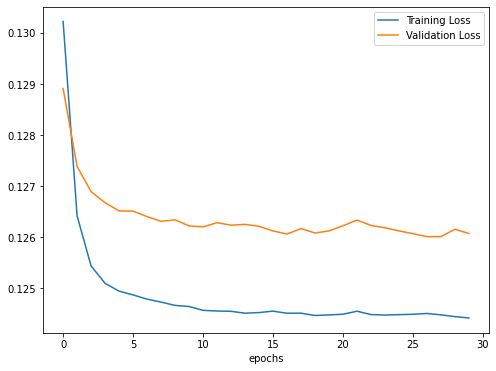

In [ ]:
score = model.evaluate(x_test, x_test)
print('Test score:', score)

#acc = history_callback.history['accuracy']
loss = history_callback.history['loss']

#val_acc = history_callback.history['val_accuracy']
val_loss = history_callback.history['val_loss']

fig, (ax2) = plt.subplots(1,figsize=(8,6))
#ax1.plot(acc,label="Training Accuracy")
#ax1.plot(val_acc,label="Validation Accuracy")
ax2.plot(loss,label="Training Loss")
ax2.plot(val_loss,label="Validation Loss")

ax2.set_xlabel('epochs')
#ax1.legend()
ax2.legend()
plt.show()

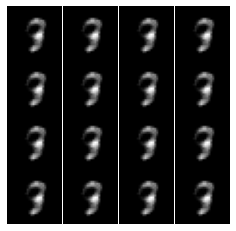

----------- EPOCH 0 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1245 - accuracy: 0.0000e+00 - precision: 0.6824 - recall: 0.0720


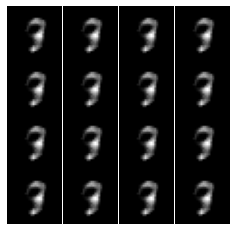

----------- EPOCH 1 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1245 - accuracy: 0.0000e+00 - precision: 0.6829 - recall: 0.0686


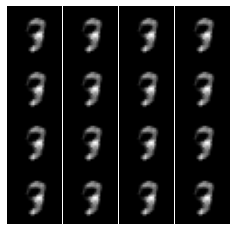

----------- EPOCH 2 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1245 - accuracy: 0.0000e+00 - precision: 0.6800 - recall: 0.0733


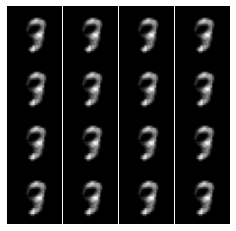

----------- EPOCH 3 -----------
10/10 [==============================] - 0s 5ms/step - loss: 0.1245 - accuracy: 0.0000e+00 - precision: 0.6757 - recall: 0.0946


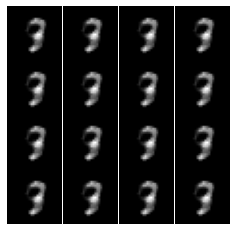

----------- EPOCH 4 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6760 - recall: 0.0650


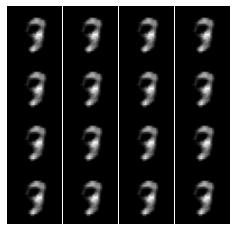

----------- EPOCH 5 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6843 - recall: 0.0601


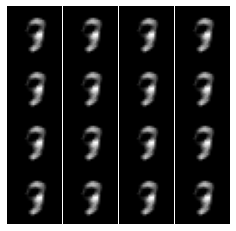

----------- EPOCH 6 -----------
10/10 [==============================] - 0s 5ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6777 - recall: 0.0778


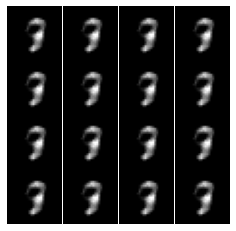

----------- EPOCH 7 -----------
10/10 [==============================] - 0s 5ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6747 - recall: 0.0787


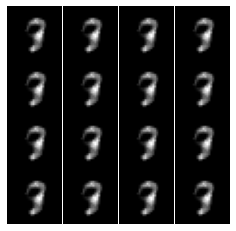

----------- EPOCH 8 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1245 - accuracy: 0.0000e+00 - precision: 0.6793 - recall: 0.0705


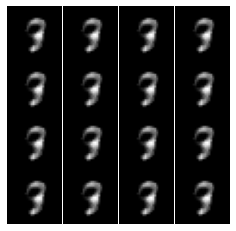

----------- EPOCH 9 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6784 - recall: 0.0706


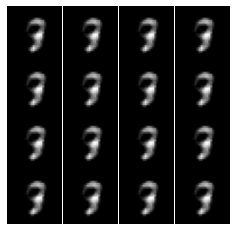

----------- EPOCH 10 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1245 - accuracy: 0.0000e+00 - precision: 0.6730 - recall: 0.0851


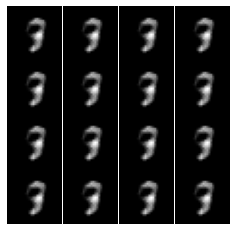

----------- EPOCH 11 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1245 - accuracy: 0.0000e+00 - precision: 0.6706 - recall: 0.0868


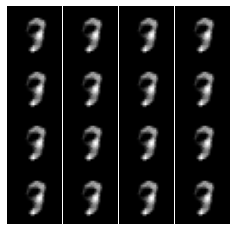

----------- EPOCH 12 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1245 - accuracy: 0.0000e+00 - precision: 0.6785 - recall: 0.0666


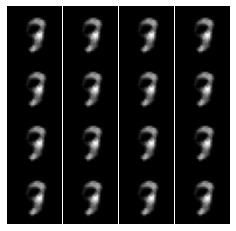

----------- EPOCH 13 -----------
10/10 [==============================] - 0s 5ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6824 - recall: 0.0649


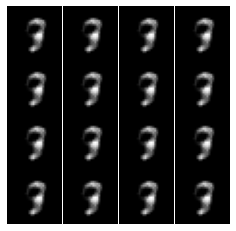

----------- EPOCH 14 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6827 - recall: 0.0718


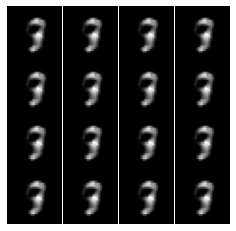

----------- EPOCH 15 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6810 - recall: 0.0644


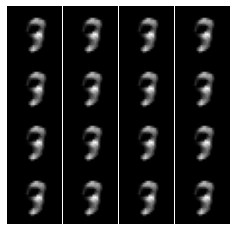

----------- EPOCH 16 -----------
10/10 [==============================] - 0s 5ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6786 - recall: 0.0707


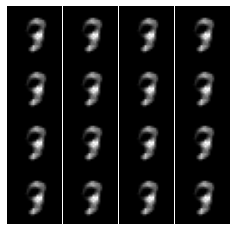

----------- EPOCH 17 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6850 - recall: 0.0600


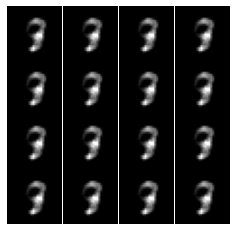

----------- EPOCH 18 -----------
10/10 [==============================] - 0s 5ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6815 - recall: 0.0738


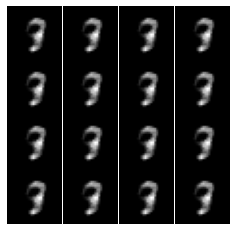

----------- EPOCH 19 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6834 - recall: 0.0630


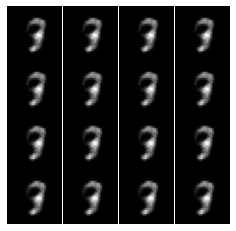

----------- EPOCH 20 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6825 - recall: 0.0640


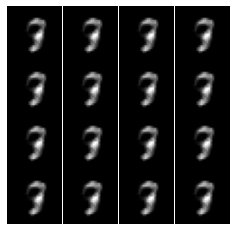

----------- EPOCH 21 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6787 - recall: 0.0747


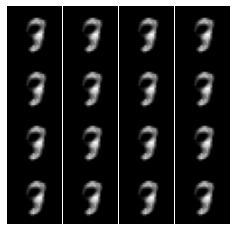

----------- EPOCH 22 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6779 - recall: 0.0780


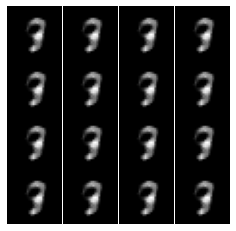

----------- EPOCH 23 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6865 - recall: 0.0717


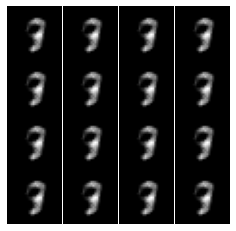

----------- EPOCH 24 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6777 - recall: 0.0690


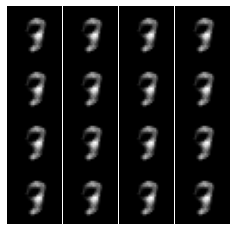

----------- EPOCH 25 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6825 - recall: 0.0723


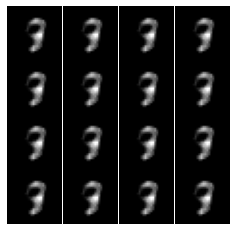

----------- EPOCH 26 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6843 - recall: 0.0701


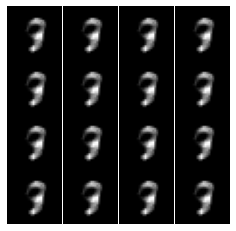

----------- EPOCH 27 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6791 - recall: 0.0745


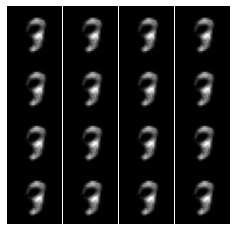

----------- EPOCH 28 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.0000e+00 - precision: 0.6821 - recall: 0.0669


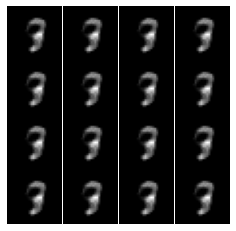

----------- EPOCH 29 -----------
10/10 [==============================] - 0s 6ms/step - loss: 0.1245 - accuracy: 0.0000e+00 - precision: 0.6759 - recall: 0.0707


In [ ]:
#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    #display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train, batch_size = 64)